In [2]:
from selenium import webdriver
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from transformers import pipeline
from googletrans import Translator
import matplotlib.pyplot as plt

In [3]:
driver = webdriver.Chrome()
driver.get('https://play.google.com/store/apps/details?id=com.whatsapp')
translator = Translator()

f_estrela = [(int(driver.find_element(By.CLASS_NAME, 'iXRFPc').get_attribute('aria-label').split()[1]))]
f_comentario = [driver.find_element(By.CLASS_NAME, 'h3YV2d').text]

more = driver.find_element(By.XPATH, '//*[@id="yDmH0d"]/c-wiz[2]/div/div/div[2]/div[2]/div/div[1]/div[1]/c-wiz[4]/section/div/div[2]/div[5]/div/div/button/span').click()


estrelas = driver.find_elements(By.CLASS_NAME, 'iXRFPc')
estrelas = [int(estrela.get_attribute('aria-label').split()[1]) for estrela in estrelas]

comentarios = driver.find_elements(By.CLASS_NAME, 'h3YV2d')
comentarios = [translator.translate(comentario.text, dest='en').text for comentario in comentarios]

estrelas = f_estrela + estrelas[1:]
comentarios = f_comentario + comentarios[1:]

driver.close()

In [4]:
print("Mean stars: " + str(round(sum(estrelas)/len(estrelas), 2)))

Mean stars: 2.4


In [5]:
pipe = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment-latest")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.0.1+cu118 with CUDA 1108 (you have 2.0.1+cpu)
    Python  3.10.11 (you have 3.10.6)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Me

In [6]:
opinions = {'positive': 0, 'negative': 0, 'neutral': 0}

for comment in comentarios:
    opinions[pipe(comment)[0]['label']] += 1

print(f'{opinions["positive"]} people likes this app')
print(f'{opinions["neutral"]} people prefer not say')
print(f'{opinions["negative"]} people does not like this app')

5 people likes this app
5 people prefer not say
33 people does not like this app


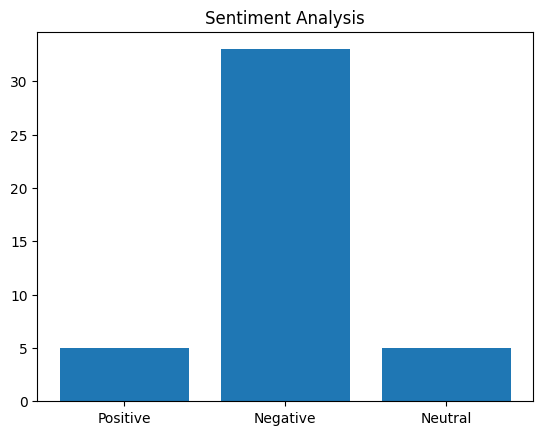

In [12]:
plt.title("Sentiment Analysis")
plt.bar(['Positive', 'Negative', 'Neutral'], [opinions['positive'], opinions['negative'], opinions['neutral']])
plt.show()